In [1]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
import numpy as np
import math
import random
import os

# Tre magneti

## Un po' di storia
In una vecchia (pensate) video cassetta: Le Scienze Mondadori Video I FRATTALI settembre 1991, era presentata un
interessante studio di un moto complesso, nell'allegato alla cassetta erano indicate le basi del problema e tracce
di soluzione.

Nel corso degli anni ho proposto e riproposto questo problema. In particolare nel 2002 con una classe del PNI si è giunti ad un lavoro, direi, di buon livello.

Ma lasciamo da parte il passato e riproviamo a risolvere il problema.

## Il problema
Un pendolo semplice la cui massa è una sferetta, si muove sottoposta all'azione di tre calamite, situate ai vertici di un triangolo equilatero.

(la sferetta, ovviamente è ferromagnetica).

Elenchiamo le forze in gioco:

$F_{pendolo} = -Kd$ dove $d$ è la distanza dal centro di oscillazione

$F_{magnete} = \dfrac{H}{s^2}$ dove $s$ è la distanza dal centro del magnete

$F_{attrito} = -bv$

Il codice che segue è una proposta di soluzione.

In [2]:
#definizioni costanti del moto
#Cm = costante forza di richiamo pendolo/massa (ipotesi lunghezza pendolo circa 3 m)
Cm = 3.3
#Fm = costante forza magnetica/massa
Fm = 2
#Bm = costante forza attrito/massa
Bm = 4

#coordinate posizione magneti in metri
X1 = -0.05
Y1 = -0.0288675
X2 = 0.05
Y2 = -0.0288675
X3 = 0
Y3 = 0.057735
RaggioMagnete = 0.013

#intervallo di tempo
Dt = 0.0001

#Colori
A1=(1.0, 0.0, 0.0, 1.0)
A2=(1.0, 1.0, 0.0, 1.0)
A3=(0.0, 0.0, 1.0, 1.0)
sceltacolori = np.array([A1,A2,A3])
#Dimensioni area di oscillazione in metri
Intervallo = 0.1
#Numero di punti DivisionixDivisioni
Divisioni = 400

In [3]:
def Muovi(X, Y, Fm):
    Vx = 0
    Vy = 0
    VLimite = Fm / RaggioMagnete
    Condizione = False
    Tempo = 0
    while Condizione == False:
        r1 = math.sqrt((X - X1) ** 2 + (Y - Y1) ** 2)
        r2 = math.sqrt((X - X2) ** 2 + (Y - Y2) ** 2)
        r3 = math.sqrt((X - X3) ** 2 + (Y - Y3) ** 2)
        if r1 <= RaggioMagnete:
            r1 = RaggioMagnete
            Condizione = True
            Cmag = 0
        if r2 <= RaggioMagnete:
            r2 = RaggioMagnete
            Condizione = True
            Cmag = 1
        if r3 <= RaggioMagnete:
            r3 = RaggioMagnete
            Condizione = True
            Cmag = 2
        ax = Fm * ((X1 - X) / r1 ** 3 + (X2 - X) / r2 ** 3 + (X3 - X) / r3 ** 3) - Cm * X - Bm * Vx
        ay = Fm * ((Y1 - Y) / r1 ** 3 + (Y2 - Y) / r2 ** 3 + (Y3 - Y) / r3 ** 3) - Cm * Y - Bm * Vy
        Vx = Vx + ax * Dt
        Vy = Vy + ay * Dt
        if (Vx * Vx + Vy * Vy) >= VLimite:
            Condizione = False
        X = X + Vx * Dt
        Y = Y + Vy * Dt
        Tempo = Tempo + Dt
    return Cmag

In [6]:
def Traccia(X, Y):
    puntiX = []
    puntiY = []
    Vx = 0
    Vy = 0
    VLimite = Fm / RaggioMagnete
    Condizione = False
    Tempo = 0
    while Condizione == False:
        r1 = math.sqrt((X - X1) ** 2 + (Y - Y1) ** 2)
        r2 = math.sqrt((X - X2) ** 2 + (Y - Y2) ** 2)
        r3 = math.sqrt((X - X3) ** 2 + (Y - Y3) ** 2)
        if r1 <= RaggioMagnete:
            r1 = RaggioMagnete
            Condizione = True
            Cmag = 0
        if r2 <= RaggioMagnete:
            r2 = RaggioMagnete
            Condizione = True
            Cmag = 1
        if r3 <= RaggioMagnete:
            r3 = RaggioMagnete
            Condizione = True
            Cmag = 2
        ax = Fm * ((X1 - X) / r1 ** 3 + (X2 - X) / r2 ** 3 + (X3 - X) / r3 ** 3) - Cm * X - Bm * Vx
        ay = Fm * ((Y1 - Y) / r1 ** 3 + (Y2 - Y) / r2 ** 3 + (Y3 - Y) / r3 ** 3) - Cm * Y - Bm * Vy
        Vx = Vx + ax * Dt
        Vy = Vy + ay * Dt
        if (Vx * Vx + Vy * Vy) >= VLimite:
            Condizione = False
        puntiX.append(X)
        puntiY.append(Y)
        X = X + Vx * Dt
        Y = Y + Vy * Dt
        Tempo = Tempo + Dt
    puntiX = np.array(puntiX, dtype=np.float64)
    puntiY = np.array(puntiY, dtype=np.float64)
    return puntiX, puntiY, Cmag

In [7]:
def disegna(Fmag):
    ptX = []
    ptY = []
    colori = []
    TempoM = Dt
    xLimm = -Intervallo
    yLimm = -Intervallo
    xLimM = Intervallo
    yLimM = Intervallo
    x = - Intervallo
    Dxy = 2 * Intervallo / Divisioni
    for I in range(0,Divisioni):
        y = -Intervallo
        for J in range (0,Divisioni):
            c = Muovi(x, y, Fmag)
            ptX.append(x)
            ptY.append(y)
            colori.append(c)
            y += Dxy
        x += Dxy
    #print("simulazione terminata")
    ptX = np.array(ptX, dtype=np.float64)
    ptY = np.array(ptY, dtype=np.float64)
    colori = np.array(colori, dtype=np.int32)
    return ptX, ptY, colori

simulazione terminata
simulazione terminata
simulazione terminata
simulazione terminata


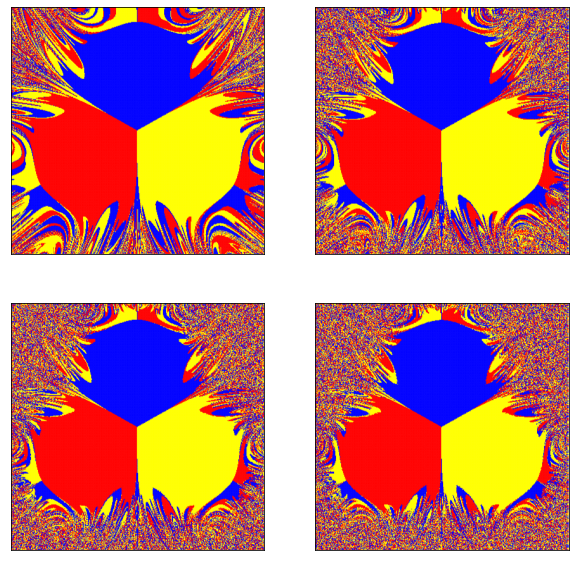

In [11]:
figura, riquadro = plt.subplots(2, 2, figsize=(10, 10))
Fm = 0.5
x, y, colori = disegna(Fm)
riquadro[0,0].set_xlim([-Intervallo,Intervallo])
riquadro[0,0].set_ylim([-Intervallo,Intervallo])
riquadro[0,0].set_yticklabels([])
riquadro[0,0].set_xticklabels([])
riquadro[0,0].set_yticks([])
riquadro[0,0].set_xticks([])
riquadro[0,0].scatter(x,y,0.1,color=sceltacolori[colori])
#
Fm = 1.0
x, y, colori = disegna(Fm)
riquadro[0,1].set_xlim([-Intervallo,Intervallo])
riquadro[0,1].set_ylim([-Intervallo,Intervallo])
riquadro[0,1].set_yticklabels([])
riquadro[0,1].set_xticklabels([])
riquadro[0,1].set_yticks([])
riquadro[0,1].set_xticks([])
riquadro[0,1].scatter(x,y,0.1,color=sceltacolori[colori])
#
#
Fm = 1.5
x, y, colori = disegna(Fm)
riquadro[1,0].set_xlim([-Intervallo,Intervallo])
riquadro[1,0].set_ylim([-Intervallo,Intervallo])
riquadro[1,0].set_yticklabels([])
riquadro[1,0].set_xticklabels([])
riquadro[1,0].set_yticks([])
riquadro[1,0].set_xticks([])
riquadro[1,0].scatter(x,y,0.1,color=sceltacolori[colori])
#
#
Fm = 2.0
x, y, colori = disegna(Fm)
riquadro[1,1].set_xlim([-Intervallo,Intervallo])
riquadro[1,1].set_ylim([-Intervallo,Intervallo])
riquadro[1,1].set_yticklabels([])
riquadro[1,1].set_xticklabels([])
riquadro[1,1].set_yticks([])
riquadro[1,1].set_xticks([])
riquadro[1,1].scatter(x,y,0.1,color=sceltacolori[colori])
plt.show()

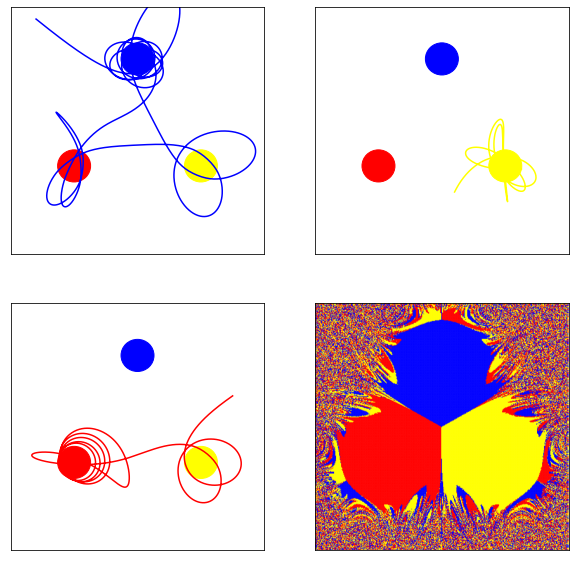

In [7]:
col = []
punX = []
punY = []
figura, riquadro = plt.subplots(2, 2, figsize=(10, 10))
magnete1 = plt.Circle((X1, Y1), RaggioMagnete, color=A1)
magnete2 = plt.Circle((X2, Y2), RaggioMagnete, color=A2)
magnete3 = plt.Circle((X3, Y3), RaggioMagnete, color=A3)
riquadro[0,0].set_xlim([-Intervallo,Intervallo])
riquadro[0,0].set_ylim([-Intervallo,Intervallo])
riquadro[0,0].add_artist(magnete1)
riquadro[0,0].add_artist(magnete2)
riquadro[0,0].add_artist(magnete3)
riquadro[0,0].set_yticklabels([])
riquadro[0,0].set_xticklabels([])
riquadro[0,0].set_yticks([])
riquadro[0,0].set_xticks([])
pX,pY,c = Traccia(-0.08,0.09)
if c == 0:
    colore = A1
elif c == 1:
    colore = A2
elif c == 2:
    colore = A3
riquadro[0,0].plot(pX,pY,color=colore)
#
magnete11 = plt.Circle((X1, Y1), RaggioMagnete, color=A1)
magnete21 = plt.Circle((X2, Y2), RaggioMagnete, color=A2)
magnete31 = plt.Circle((X3, Y3), RaggioMagnete, color=A3)
riquadro[1,0].set_xlim([-Intervallo,Intervallo])
riquadro[1,0].set_ylim([-Intervallo,Intervallo])
riquadro[1,0].add_artist(magnete11)
riquadro[1,0].add_artist(magnete21)
riquadro[1,0].add_artist(magnete31)
riquadro[1,0].set_yticklabels([])
riquadro[1,0].set_xticklabels([])
riquadro[1,0].set_yticks([])
riquadro[1,0].set_xticks([])
pX,pY,c = Traccia(0.075,0.025)
if c == 0:
    colore = A1
elif c == 1:
    colore = A2
elif c == 2:
    colore = A3
riquadro[1,0].plot(pX,pY,color=colore)
#
magnete12 = plt.Circle((X1, Y1), RaggioMagnete, color=A1)
magnete22 = plt.Circle((X2, Y2), RaggioMagnete, color=A2)
magnete32 = plt.Circle((X3, Y3), RaggioMagnete, color=A3)
riquadro[0,1].set_xlim([-Intervallo,Intervallo])
riquadro[0,1].set_ylim([-Intervallo,Intervallo])
riquadro[0,1].add_artist(magnete12)
riquadro[0,1].add_artist(magnete22)
riquadro[0,1].add_artist(magnete32)
riquadro[0,1].set_yticklabels([])
riquadro[0,1].set_xticklabels([])
riquadro[0,1].set_yticks([])
riquadro[0,1].set_xticks([])
pX,pY,c = Traccia(0.010,-0.05)
if c == 0:
    colore = A1
elif c == 1:
    colore = A2
elif c == 2:
    colore = A3
riquadro[0,1].plot(pX,pY,color=colore)
##
plt.scatter(ptX,ptY,0.1,color=sceltacolori[colori])
riquadro[1,1].set_xlim([-Intervallo,Intervallo])
riquadro[1,1].set_ylim([-Intervallo,Intervallo])
riquadro[1,1].set_yticklabels([])
riquadro[1,1].set_xticklabels([])
riquadro[1,1].set_yticks([])
riquadro[1,1].set_xticks([])
plt.scatter(ptX,ptY,0.1,color=sceltacolori[col])
#
plt.savefig('tremagM.png')
#
plt.show()

È proprio un frattale?

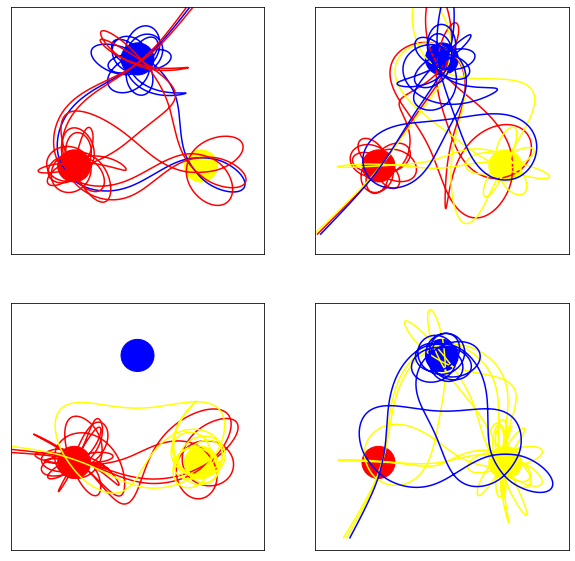

In [8]:
dx = 2*Intervallo/Divisioni
figura, riquadro = plt.subplots(2, 2, figsize=(10, 10))
magnete1 = plt.Circle((X1, Y1), RaggioMagnete, color=A1)
magnete2 = plt.Circle((X2, Y2), RaggioMagnete, color=A2)
magnete3 = plt.Circle((X3, Y3), RaggioMagnete, color=A3)
riquadro[0,0].set_xlim([-Intervallo,Intervallo])
riquadro[0,0].set_ylim([-Intervallo,Intervallo])
riquadro[0,0].add_artist(magnete1)
riquadro[0,0].add_artist(magnete2)
riquadro[0,0].add_artist(magnete3)
riquadro[0,0].set_yticklabels([])
riquadro[0,0].set_xticklabels([])
riquadro[0,0].set_yticks([])
riquadro[0,0].set_xticks([])
xIniz0 = 2*random.random()*Intervallo-Intervallo
xIniz = xIniz0
yIniz = Intervallo-0.02*random.random()
pX,pY,c = Traccia(xIniz,yIniz)
if c == 0:
    colore = A1
elif c == 1:
    colore = A2
elif c == 2:
    colore = A3
riquadro[0,0].plot(pX,pY,color=colore)
xIniz = xIniz-5*dx
pX,pY,c = Traccia(xIniz,yIniz)
if c == 0:
    colore = A1
elif c == 1:
    colore = A2
elif c == 2:
    colore = A3
riquadro[0,0].plot(pX,pY,color=colore)
xIniz = xIniz0+5*dx
pX,pY,c = Traccia(xIniz,yIniz)
if c == 0:
    colore = A1
elif c == 1:
    colore = A2
elif c == 2:
    colore = A3
riquadro[0,0].plot(pX,pY,color=colore)
#
magnete11 = plt.Circle((X1, Y1), RaggioMagnete, color=A1)
magnete21 = plt.Circle((X2, Y2), RaggioMagnete, color=A2)
magnete31 = plt.Circle((X3, Y3), RaggioMagnete, color=A3)
riquadro[1,0].set_xlim([-Intervallo,Intervallo])
riquadro[1,0].set_ylim([-Intervallo,Intervallo])
riquadro[1,0].add_artist(magnete11)
riquadro[1,0].add_artist(magnete21)
riquadro[1,0].add_artist(magnete31)
riquadro[1,0].set_yticklabels([])
riquadro[1,0].set_xticklabels([])
riquadro[1,0].set_yticks([])
riquadro[1,0].set_xticks([])
yIniz0 = 2*random.random()*Intervallo-Intervallo
yIniz = yIniz0
xIniz = -Intervallo+0.02*random.random()
pX,pY,c = Traccia(xIniz,yIniz)
if c == 0:
    colore = A1
elif c == 1:
    colore = A2
elif c == 2:
    colore = A3
riquadro[1,0].plot(pX,pY,color=colore)
yIniz = yIniz-5*dx
pX,pY,c = Traccia(xIniz,yIniz)
if c == 0:
    colore = A1
elif c == 1:
    colore = A2
elif c == 2:
    colore = A3
riquadro[1,0].plot(pX,pY,color=colore)
yIniz = yIniz0+5*dx
pX,pY,c = Traccia(xIniz,yIniz)
if c == 0:
    colore = A1
elif c == 1:
    colore = A2
elif c == 2:
    colore = A3
riquadro[1,0].plot(pX,pY,color=colore)
#
magnete12 = plt.Circle((X1, Y1), RaggioMagnete, color=A1)
magnete22 = plt.Circle((X2, Y2), RaggioMagnete, color=A2)
magnete32 = plt.Circle((X3, Y3), RaggioMagnete, color=A3)
riquadro[0,1].set_xlim([-Intervallo,Intervallo])
riquadro[0,1].set_ylim([-Intervallo,Intervallo])
riquadro[0,1].add_artist(magnete12)
riquadro[0,1].add_artist(magnete22)
riquadro[0,1].add_artist(magnete32)
riquadro[0,1].set_yticklabels([])
riquadro[0,1].set_xticklabels([])
riquadro[0,1].set_yticks([])
riquadro[0,1].set_xticks([])
xIniz0 = 2*random.random()*Intervallo-Intervallo
xIniz = xIniz0
yIniz = -Intervallo+0.02*random.random()
pX,pY,c = Traccia(xIniz,yIniz)
if c == 0:
    colore = A1
elif c == 1:
    colore = A2
elif c == 2:
    colore = A3
riquadro[0,1].plot(pX,pY,color=colore)
xIniz = xIniz-5*dx
pX,pY,c = Traccia(xIniz,yIniz)
if c == 0:
    colore = A1
elif c == 1:
    colore = A2
elif c == 2:
    colore = A3
riquadro[0,1].plot(pX,pY,color=colore)
xIniz = xIniz0+5*dx
pX,pY,c = Traccia(xIniz,yIniz)
if c == 0:
    colore = A1
elif c == 1:
    colore = A2
elif c == 2:
    colore = A3
riquadro[0,1].plot(pX,pY,color=colore)
#
magnete13 = plt.Circle((X1, Y1), RaggioMagnete, color=A1)
magnete23 = plt.Circle((X2, Y2), RaggioMagnete, color=A2)
magnete33 = plt.Circle((X3, Y3), RaggioMagnete, color=A3)
riquadro[1,1].set_xlim([-Intervallo,Intervallo])
riquadro[1,1].set_ylim([-Intervallo,Intervallo])
riquadro[1,1].add_artist(magnete13)
riquadro[1,1].add_artist(magnete23)
riquadro[1,1].add_artist(magnete33)
riquadro[1,1].set_yticklabels([])
riquadro[1,1].set_xticklabels([])
riquadro[1,1].set_yticks([])
riquadro[1,1].set_xticks([])
xIniz0 = 2*random.random()*Intervallo-Intervallo
xIniz = xIniz0
yIniz = -Intervallo+0.02*random.random()
pX,pY,c = Traccia(xIniz,yIniz)
if c == 0:
    colore = A1
elif c == 1:
    colore = A2
elif c == 2:
    colore = A3
riquadro[1,1].plot(pX,pY,color=colore)
xIniz = xIniz-5*dx
pX,pY,c = Traccia(xIniz,yIniz)
if c == 0:
    colore = A1
elif c == 1:
    colore = A2
elif c == 2:
    colore = A3
riquadro[1,1].plot(pX,pY,color=colore)
xIniz = xIniz0+5*dx
pX,pY,c = Traccia(xIniz,yIniz)
if c == 0:
    colore = A1
elif c == 1:
    colore = A2
elif c == 2:
    colore = A3
riquadro[1,1].plot(pX,pY,color=colore)
plt.show()

## Animazione

In [34]:
from celluloid import Camera

0

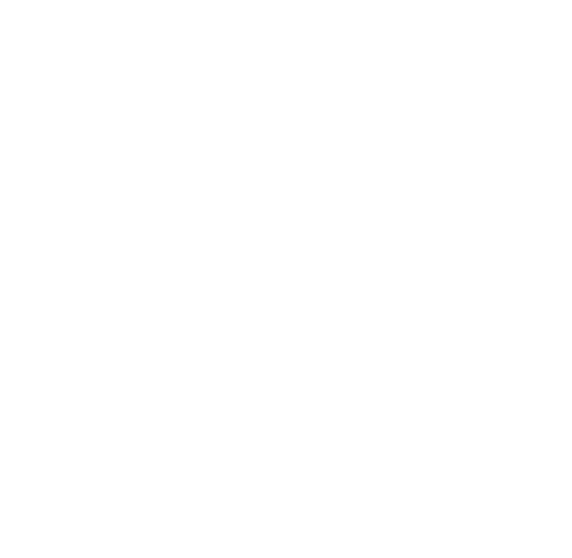

In [56]:
figura = plt.figure(figsize=(10,10))
plt.xlim([-Intervallo,Intervallo])
plt.ylim([-Intervallo,Intervallo])
plt.axis('off')
camera = Camera(figura)
for i in range(0,30):
    Fm = 0.5+0.15*i
    x, y, cl = disegna(Fm)
    plt.scatter(x,y,0.1,color=sceltacolori[cl])
    camera.snap()   
anim = camera.animate()
beep = lambda x: os.system("echo -n '\a';sleep 0.2;" * x)
beep(10)

In [57]:
anim.save('treMagFm.mp4')

<video controls src="treMagFm.mp4" />